In [31]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from PIL import Image

In [46]:

# Define your transformation pipeline
transform = transforms.Compose([
    transforms.Resize((56, 56)),
    transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the dataset using ImageFolder
data_dir = 'datasets/afhq256/train'
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Create a DataLoader with the dataset
batch_size = 32
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=0)

# Load sample images and labels

images, labels = next(iter(data_loader))

print('Images shape:', images.shape)  # [batch_size, channels, height, width]
print('Labels shape:', labels.shape)  # [batch_size]


Images shape: torch.Size([32, 3, 56, 56])
Labels shape: torch.Size([32])


In [47]:
grid_image = transforms.ToPILImage()(make_grid(images, ncols=8))

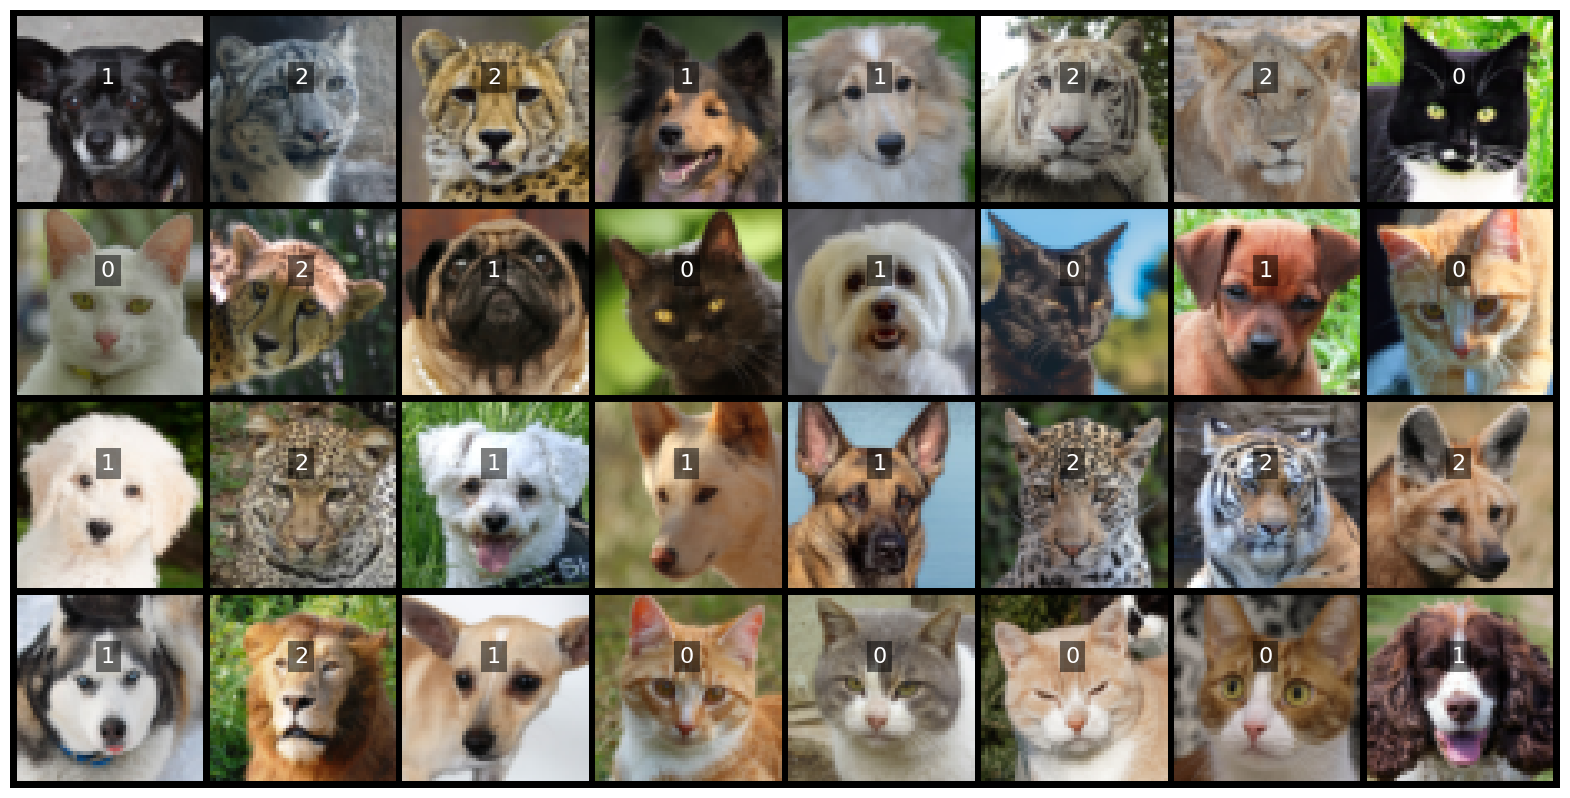

In [48]:
# Visualize the grid image with labels
plt.figure(figsize=(20, 20))
plt.imshow(grid_image)

# Define label positioning and display labels on top of the images
width = grid_image.width
height = grid_image.height
rows = images.shape[0] // 8 + (1 if images.shape[0] % 8 > 0 else 0)
image_width = width // 8
image_height = height // rows

for idx, label in enumerate(labels):
    row_idx = idx // 8
    col_idx = idx % 8
    x = col_idx * image_width + image_width // 2
    y = row_idx * image_height + 20
    plt.text(x, y, str(label.item()), color='white', fontsize=16, ha='center', va='center', bbox=dict(facecolor='black', alpha=0.5, lw=0))

plt.axis('off')
plt.show()

In [49]:
# # Create the dataset using ImageFolder
# data_dir = 'datasets/afhq256/train/cat'
# dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

In [50]:
dataset.classes

['cat', 'dog', 'wild']

In [53]:
labels.dtype

torch.int64

In [54]:
torch.randint(low=0, high=len(dataset.classes), size=labels.size()).dtype

torch.int64

In [45]:
len(dataset.classes)

1